<a href="https://colab.research.google.com/github/washof/2024_Geoinformatique_I/blob/main/Geoinformatique_I/IP/Tutoriel_IP/S4_IP_tutoriel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutoriel 4: Fonction et calcul scientifique

Dans cette section, nous aborderons les points suivants:

1. Fonction
2. Calcul scientifique avec `NumPy`
3. Base de visualisation avec `Matplotlib`


## Fonction

Pour les tâches plus longues et plus complexes, il est important d'organiser votre code en éléments réutilisables. Par exemple, si vous vous retrouvez à couper et coller les mêmes lignes de code ou des lignes similaires à plusieurs reprises, vous devez probablement définir une *fonction* pour encapsuler ce code et le rendre réutilisable. Un principe important de la programmation en **DRY** : "ne vous répétez pas". La répétition est fastidieuse et vous expose à des erreurs. Recherchez l'élégance et la simplicité dans vos programmes.

Référence :
* IBM Congnitive Class - Intro to Python (https://github.com/computationalcore/introduction-to-python)
* CUSP UCSL bootcamp 2017 (https://github.com/Mohitsharma44/ucsl17)
* Introduction to Python (Ryan Abernathy; https://rabernat.github.io/research_computing/intro-to-python.html)

Les fonctions sont un élément central de la programmation avancée en Python. Les fonctions prennent des entrées ("arguments") et font quelque chose en réponse. En général, les fonctions renvoient quelque chose, mais pas toujours.

In [1]:
#@title **Define a Function**
def say_hello():
    """Return the word hello."""
    return 'Hello'

def say_hello_to(name=None):
  """
  Return the word hello to someone
  """
  return 'Hello, '+str(name)

# take an optional keyword argument
def say_hello_or_hola(name, french=False):
    """Say hello in multiple languages."""
    if french:
        greeting = 'Bonjour '
    else:
        greeting = 'Hello '
    return greeting + name

# flexible number of arguments
def say_hello_to_everyone(*args):
    return ['Bonjour ' + str(a) for a in args]

In [2]:
print(say_hello())
res = say_hello()
print(res)

Hello
Hello


In [3]:
print(say_hello_or_hola('Frédéric', french=True)) # Saluer le recteur
print(say_hello_or_hola('Frédéric', french=False))
print(say_hello_to_everyone('Niklas', 'Valérie', 'Marie-Élodie')) # Saluer les doyens

Bonjour Frédéric
Hello Frédéric
['Bonjour Niklas', 'Bonjour Valérie', 'Bonjour Marie-Élodie']


In [5]:
#@title **Fonction anonyme**
mul = lambda a, b: a*b
print(mul(4,5))

x = lambda a : a + 10
print(x(5))

20
15


In [6]:
#@title **Fonction map**
# syntaxe : map(function,iterator)
numbers = range(1, 10)
def square(num):
    return num**2
list(map(square, numbers))
# L'équivalent de cette fonction est :
# result = []
# for i in range(1, 10) :
# result.append(i**2)

[1, 4, 9, 16, 25, 36, 49, 64, 81]

In [7]:
# On peut aussi l'écrire en une seule ligne !
list(map(lambda x : x**2, range(1, 10)))

[1, 4, 9, 16, 25, 36, 49, 64, 81]

### Fonctions pures et fonctions impures
Les fonctions qui ne modifient pas leurs arguments ou ne produisent pas d'autres effets secondaires sont appelées *pures*.

Les fonctions qui modifient leurs arguments ou provoquent d'autres actions sont appelées *pures*.

In [8]:
# Fonctions impures
def remove_last_from_list(input_list) :
    input_list.pop()
names = ['Niklas', 'Valérie', 'Marie-Élodie']
remove_last_from_list(names)
print(names)
remove_last_from_list(names)
print(names)

['Niklas', 'Valérie']
['Niklas']


In [9]:
# Fonctions impures
def remove_last_from_list(input_list) :
    input_list.pop()
names = ['Niklas', 'Valérie', 'Marie-Élodie']
remove_last_from_list(names)
print(names)
remove_last_from_list(names)
print(names)

['Niklas', 'Valérie']
['Niklas']


### Espace de noms
En Python, un espace de noms est une correspondance entre les noms de variables et les objets Python. On peut l'assimiler à un dictionnaire.
L'espace de noms peut changer en fonction de l'endroit où vous vous trouvez dans votre programme. Les fonctions peuvent "voir" les variables dans l'espace de noms parent, mais elles peuvent également les redéfinir dans une portée privée.

Il est important que vous soyez conscient des espaces de noms dans votre code, en particulier lorsque vous traitez avec des objets mutables.

In [10]:
name = 'Tom' # Entrez votre nom ici
def print_name():
    print(name)

def print_name_v2():
    name = 'Estelle'
    print(name)

print_name()
print_name_v2()
print(name)

Tom
Estelle
Tom


In [11]:
friends_list = ['Mario', 'Florence', 'Richard']
pet_tuple = ('Hedwig', 'Na-paw-lyon', 'Cat-hilda')

In [12]:
def greeter(friends, pets):
    print("It's time to say hi to my friends.")
    [print(f'Hi {name}! ', end="") for name in friends]
    print('\nThese are the names of my pets:')
    [print(f'{pet} ', end="") for pet in pets]
    print('\n')

def pets_are_friends(friends, pets):
    print("I consider both my pets and my friend's pets my friends!")

    #add friend's pets
    full_pets = pets
    full_pets += ('Clifford', 'Crookshanks')

    full_friends_list = friends
    full_friends_list.extend(full_pets)

    print('These are all my friends:')
    [print(f'{name} ', end="") for name in full_friends_list]
    print('\n')

In [13]:
greeter(friends_list, pet_tuple)
pets_are_friends(friends_list, pet_tuple)
greeter(friends_list, pet_tuple)

It's time to say hi to my friends.
Hi Mario! Hi Florence! Hi Richard! 
These are the names of my pets:
Hedwig Na-paw-lyon Cat-hilda 

I consider both my pets and my friend's pets my friends!
These are all my friends:
Mario Florence Richard Hedwig Na-paw-lyon Cat-hilda Clifford Crookshanks 

It's time to say hi to my friends.
Hi Mario! Hi Florence! Hi Richard! Hi Hedwig! Hi Na-paw-lyon! Hi Cat-hilda! Hi Clifford! Hi Crookshanks! 
These are the names of my pets:
Hedwig Na-paw-lyon Cat-hilda 



## Calcul scientifique avec `NumPy`

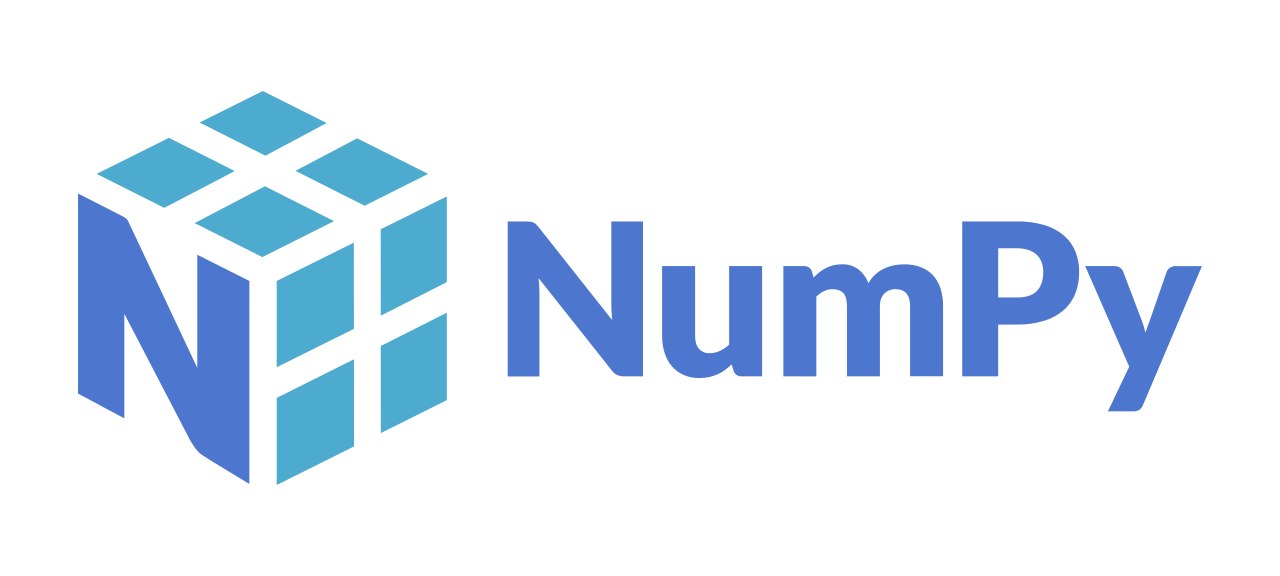

**Numpy** est le paquetage fondamental pour le calcul scientifique avec Python

Site web : https://numpy.org/

GitHub : https://github.com/numpy/numpy

### Importation et examen d'un nouveau package

Il s'agit de notre première expérience d'importation d'un paquetage qui ne fait pas partie de la bibliothèque standard de Python.

In [14]:
import numpy as np

Qu'est-ce que nous venons de faire ? Nous avons *importé* un paquetage. Cela apporte de nouvelles variables (principalement des fonctions) dans notre interpréteur. Nous y accédons de la manière suivante.

In [15]:
# trouver ce qui se trouve dans notre espace de noms
dir()

['In',
 'Out',
 '_',
 '_6',
 '_7',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i2',
 '_i3',
 '_i4',
 '_i5',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'exit',
 'friends_list',
 'get_ipython',
 'greeter',
 'mul',
 'name',
 'names',
 'np',
 'numbers',
 'pet_tuple',
 'pets_are_friends',
 'print_name',
 'print_name_v2',
 'quit',
 'remove_last_from_list',
 'res',
 'say_hello',
 'say_hello_or_hola',
 'say_hello_to',
 'say_hello_to_everyone',
 'square',
 'x']

In [16]:
# trouver ce qu'il y a dans numpy
dir(np)

['ALLOW_THREADS',
 'BUFSIZE',
 'CLIP',
 'DataSource',
 'ERR_CALL',
 'ERR_DEFAULT',
 'ERR_IGNORE',
 'ERR_LOG',
 'ERR_PRINT',
 'ERR_RAISE',
 'ERR_WARN',
 'FLOATING_POINT_SUPPORT',
 'FPE_DIVIDEBYZERO',
 'FPE_INVALID',
 'FPE_OVERFLOW',
 'FPE_UNDERFLOW',
 'False_',
 'Inf',
 'Infinity',
 'MAXDIMS',
 'MAY_SHARE_BOUNDS',
 'MAY_SHARE_EXACT',
 'NAN',
 'NINF',
 'NZERO',
 'NaN',
 'PINF',
 'PZERO',
 'RAISE',
 'RankWarning',
 'SHIFT_DIVIDEBYZERO',
 'SHIFT_INVALID',
 'SHIFT_OVERFLOW',
 'SHIFT_UNDERFLOW',
 'ScalarType',
 'True_',
 'UFUNC_BUFSIZE_DEFAULT',
 'UFUNC_PYVALS_NAME',
 'WRAP',
 '_CopyMode',
 '_NoValue',
 '_UFUNC_API',
 '__NUMPY_SETUP__',
 '__all__',
 '__builtins__',
 '__cached__',
 '__config__',
 '__deprecated_attrs__',
 '__dir__',
 '__doc__',
 '__expired_functions__',
 '__file__',
 '__former_attrs__',
 '__future_scalars__',
 '__getattr__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_add_newdoc_ufunc',
 '_builtins',
 '_distributor_init',
 '_financi

In [17]:
# trouver la version que nous avons
np.__version__

'1.26.4'

Il est impossible d'apprendre explicitement chacune de ces fonctions.
C'est pourquoi la documentation de numpy est cruciale !

https://numpy.org/doc/stable/reference/

<a name="NDArrays"></a>
### NDArrays

La classe de base est le numpy ndarray (tableau à n dimensions).

La principale différence entre un tableau numpy et un conteneur de données plus général comme `list` est la suivante :

* Les tableaux Numpy peuvent avoir N dimensions (alors que les `listes`, `tuples`, etc. n'en ont qu'une).
* Les tableaux Numpy contiennent des valeurs du même type de données (par exemple `int`, `float`), alors que les `listes` peuvent contenir n'importe quoi.
* Numpy optimise les opérations numériques sur les tableaux. Numpy est *rapide* !

In [18]:
from IPython.display import Image
Image(url='http://docs.scipy.org/doc/numpy/_images/threefundamental.png')

In [19]:
# créer un tableau à partir d'une liste
a = np.array([9,0,2,1,0])

In [20]:
# trouver le type de données
a.dtype

dtype('int64')

In [21]:
# trouver la forme
a.shape

(5,)

In [22]:
# quelle est la forme
type(a.shape)

tuple

In [25]:
# un autre tableau avec un type de données et une forme différents
b = np.array([[5,3,1,9],[9,2,3,0]], dtype=np.float64)

# vérifier le type et la forme
b.dtype, b.shape

(dtype('float64'), (2, 4))

**Note**

La dimension qui varie le plus rapidement est la dernière ! Le niveau extérieur de la hiérarchie est la première dimension. (C'est ce qu'on appelle l'indexation de type "c")

### Création de tableaux

Il existe de nombreuses façons de créer des tableaux.

In [36]:
# créer des tableaux uniformes
c = np.zeros((9,9))
d = np.ones((3,6,3), dtype=np.complex128)
e = np.full((3,3), np.pi)
f = np.ones_like(c)
g = np.zeros_like(d)
print(g)

[[[0.+0.j 0.+0.j 0.+0.j]
  [0.+0.j 0.+0.j 0.+0.j]
  [0.+0.j 0.+0.j 0.+0.j]
  [0.+0.j 0.+0.j 0.+0.j]
  [0.+0.j 0.+0.j 0.+0.j]
  [0.+0.j 0.+0.j 0.+0.j]]

 [[0.+0.j 0.+0.j 0.+0.j]
  [0.+0.j 0.+0.j 0.+0.j]
  [0.+0.j 0.+0.j 0.+0.j]
  [0.+0.j 0.+0.j 0.+0.j]
  [0.+0.j 0.+0.j 0.+0.j]
  [0.+0.j 0.+0.j 0.+0.j]]

 [[0.+0.j 0.+0.j 0.+0.j]
  [0.+0.j 0.+0.j 0.+0.j]
  [0.+0.j 0.+0.j 0.+0.j]
  [0.+0.j 0.+0.j 0.+0.j]
  [0.+0.j 0.+0.j 0.+0.j]
  [0.+0.j 0.+0.j 0.+0.j]]]


`arange` fonctionne de manière très similaire à `range`, mais il remplit le tableau "impatiemment" (c'est-à-dire immédiatement), plutôt que de générer les valeurs lors de l'itération.

In [27]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

`arange` est inclusif à gauche, exclusif à droite, tout comme `range`,
mais fonctionne aussi avec les nombres à virgule flottante.

In [28]:
np.arange(2,4,0.25)

array([2.  , 2.25, 2.5 , 2.75, 3.  , 3.25, 3.5 , 3.75])

Un besoin fréquent est de générer un tableau de N nombres, espacés régulièrement entre deux valeurs. C'est à cela que sert `linspace`.

In [29]:
np.linspace(2,4,20)

array([2.        , 2.10526316, 2.21052632, 2.31578947, 2.42105263,
       2.52631579, 2.63157895, 2.73684211, 2.84210526, 2.94736842,
       3.05263158, 3.15789474, 3.26315789, 3.36842105, 3.47368421,
       3.57894737, 3.68421053, 3.78947368, 3.89473684, 4.        ])

In [30]:
#espacé logarithmiquement
np.logspace(1,2,10)

array([ 10.        ,  12.91549665,  16.68100537,  21.5443469 ,
        27.82559402,  35.93813664,  46.41588834,  59.94842503,
        77.42636827, 100.        ])

Numpy dispose également de quelques utilitaires pour nous aider à générer des tableaux multidimensionnels. `meshgrid` crée des tableaux 2D à partir d'une combinaison de tableaux 1D.

In [67]:
x = np.linspace(-2*np.pi, 2*np.pi, 100)
y = np.linspace(-np.pi, np.pi, 50)
xx, yy = np.meshgrid(x, y)
xx.shape, yy.shape
#print(xx)

((50, 100), (50, 100))

### Indexation

L'indexation de base est similaire aux listes

In [46]:
# obtenir quelques éléments individuels de xx format: [colone, chiffre]
xx[0,0], xx[3,-2], xx[3,-5]

(-6.283185307179586, 6.156252270670908, 5.775453161144872)

In [47]:
# obtenir des lignes et des colonnes entières
xx[0].shape, xx[ :,-1].shape

((100,), (50,))

In [48]:
# obtenir des plages
xx[3:10,30:40].shape

(7, 10)

Il existe de nombreuses méthodes avancées d'indexation des tableaux. Vous pouvez [en prendre connaissance] (https://numpy.org/doc/stable/reference/arrays.indexing.html) dans le manuel. Voici un exemple.

In [49]:
# utiliser un tableau booléen comme index
idx = xx<0
yy[idx].shape

(2500,)

In [50]:
# le tableau a été aplati
xx.ravel().shape

(5000,)

## Base de visualisation avec `Matplotlib`

Il peut être difficile de travailler avec de grands tableaux sans rien voir de nos yeux ! Nous allons maintenant utiliser Matplotlib pour commencer à visualiser ces tableaux. Pour l'instant, nous ne ferons qu'effleurer la surface de Matplotlib. Nous irons beaucoup plus loin dans le prochain carnet.

In [51]:
from matplotlib import pyplot as plt

Pour tracer un tableau 1D sous forme de ligne, nous utilisons la commande `plot`.

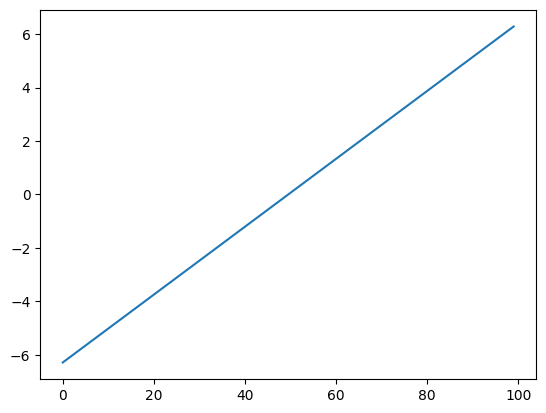

In [52]:
plt.plot(x)

Il existe de nombreuses façons de visualiser des données en 2D. Ici, nous utilisons `pcolormesh`.

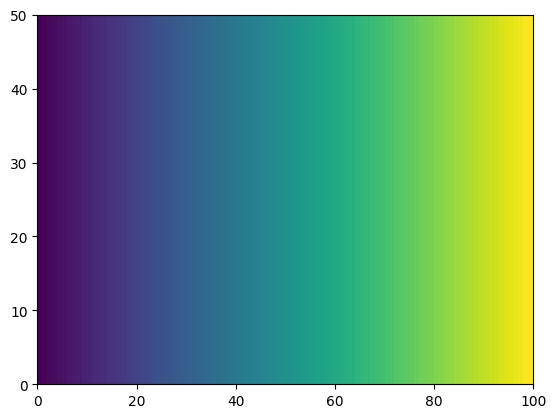

In [53]:
plt.pcolormesh(xx)

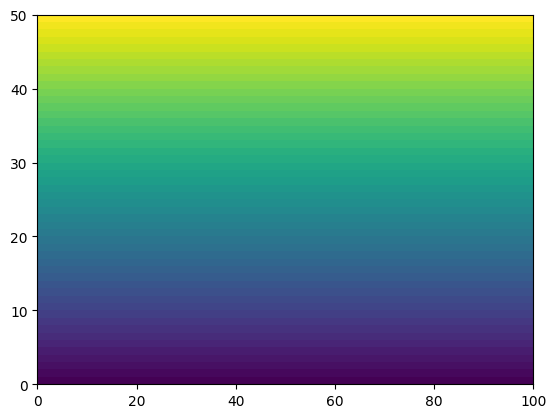

In [56]:
plt.pcolormesh(yy)

### Opérations sur les tableaux

Il existe un grand nombre d'opérations sur les tableaux. Tous les opérateurs arithmétiques familiers sont appliqués élément par élément.

#### Mathématiques de base

In [57]:
f = np.sin(xx) * np.cos(0.5*yy)

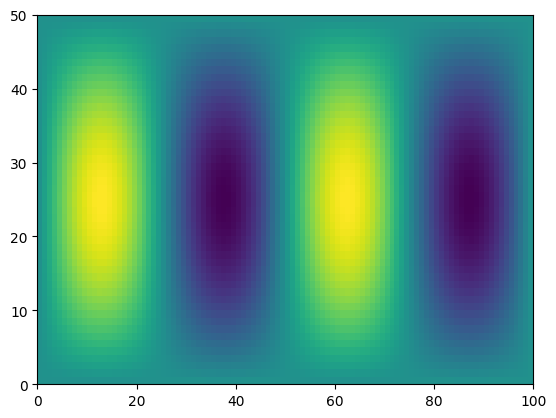

In [58]:
plt.pcolormesh(f)

#### Manipulation des dimensions des tableaux

La permutation de l'ordre des dimensions s'effectue en appelant `transpose`.

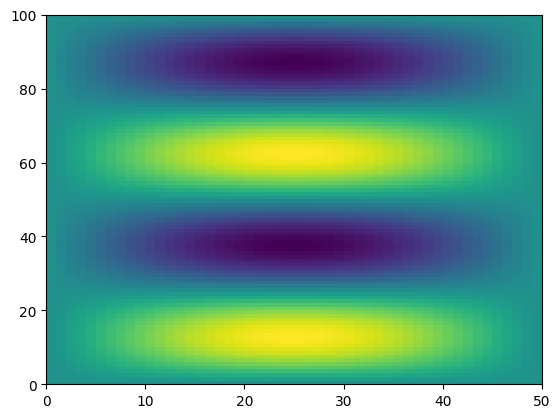

In [59]:
f_transposed = f.transpose()
plt.pcolormesh(f_transposed)

Nous pouvons également modifier manuellement la forme d'un tableau... à condition que la nouvelle forme ait le même nombre d'éléments.

In [60]:
g = np.reshape(f, (8,9))

ValueError: cannot reshape array of size 5000 into shape (8,9)

Toutefois, soyez prudent lorsque vous remodelez des données ! Vous risquez de perdre accidentellement la structure des données.

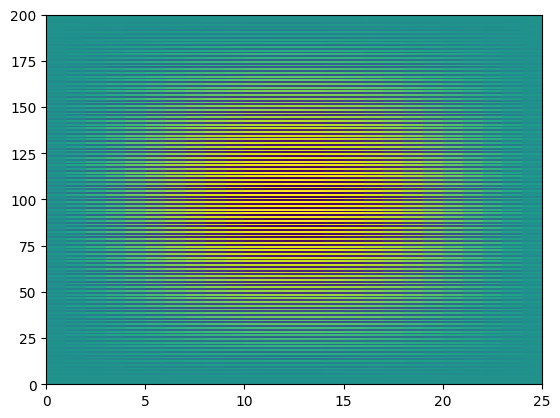

In [61]:
g = np.reshape(f, (200,25))
plt.pcolormesh(g)

Il est également possible de "carreler" (="tile") un tableau pour le répéter plusieurs fois.

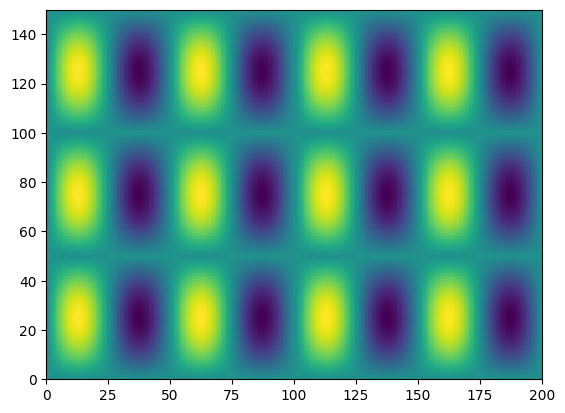

In [62]:
f_tiled = np.tile(f,(3, 2))
plt.pcolormesh(f_tiled)

Un autre besoin courant est d'ajouter une dimension supplémentaire à un tableau. Ceci peut être réalisé en indexant avec `None`.

In [63]:
x.shape

(100,)

In [64]:
x[None, :].shape

(1, 100)

In [65]:
x[None, :, None, None].shape

(1, 100, 1, 1)

### Broadcasting

Les tableaux avec lesquels nous voulons travailler n'ont pas tous la même taille. Une approche serait d'"étendre" manuellement nos tableaux pour qu'ils aient tous la même taille, par exemple en utilisant `tile`. *Broadcasting* est un moyen plus efficace de multiplier des tableaux de tailles différentes Numpy a des règles spécifiques pour le fonctionnement de la diffusion. Elles peuvent être déroutantes mais valent la peine d'être apprises si vous avez l'intention de travailler souvent avec des données Numpy.

Le concept de base de *Broadcasting* consiste à indiquer à Numpy les dimensions qui sont censées s'aligner les unes sur les autres.

In [68]:
Image(url='http://scipy-lectures.github.io/_images/numpy_broadcasting.png',
     width=720)

Les dimensions sont automatiquement alignées *en commençant par la dernière dimension*. Si les deux dernières dimensions ont la même longueur, les deux tableaux peuvent être diffusés (broadcast).

In [69]:
print(f.shape, x.shape)
g = f * x
print(g.shape)

(50, 100) (100,)
(50, 100)


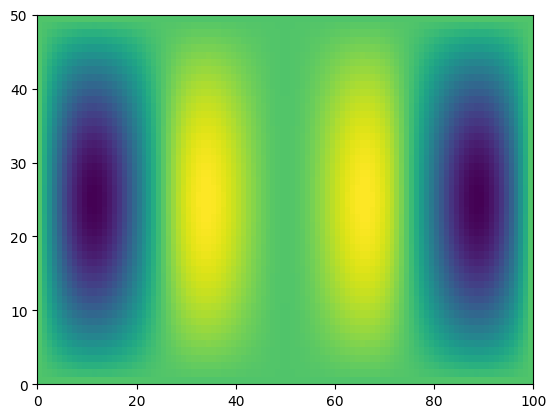

In [70]:
plt.pcolormesh(g)

Cependant, si les deux dernières dimensions ne sont pas identiques, Numpy ne peut pas le déterminer automatiquement.

In [71]:
# multiplier f par y
print(f.shape, y.shape)
h = f * y

(50, 100) (50,)


ValueError: operands could not be broadcast together with shapes (50,100) (50,) 

Nous pouvons aider numpy en ajoutant une dimension supplémentaire à `y` à la fin. Les dimensions de la longueur 50 s'aligneront alors.

In [72]:
print(f.shape, y[:, None].shape)
h = f * y[:, None]
print(h.shape)

(50, 100) (50, 1)
(50, 100)


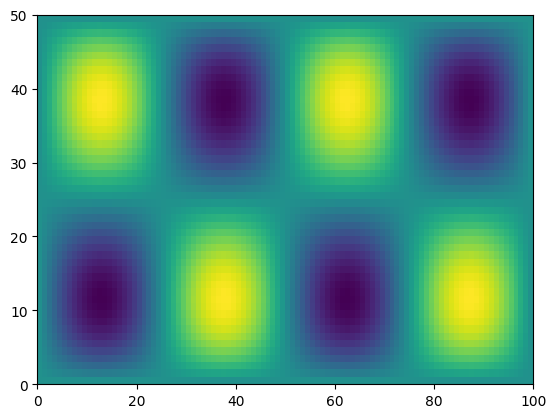

In [73]:
plt.pcolormesh(h)

<a name="Reduction_Operations"></a>
### Opérations de réduction

Dans l'analyse de données scientifiques, nous partons généralement d'un grand nombre de données et nous voulons les réduire afin de créer des graphiques ou des tableaux récapitulatifs. Les opérations qui réduisent la taille des tableaux numpy sont appelées "réductions". Il existe de nombreuses opérations de réduction différentes. Nous examinerons ici quelques-unes des plus courantes.

In [74]:
# sum
g.sum()

-3083.038387807155

In [75]:
# mean
g.mean()

-0.616607677561431

In [76]:
# standard deviation
g.std()

1.6402280119141424

Une propriété clé des réductions numpy est la possibilité d'opérer sur un seul axe.

In [77]:
# appliquer sur un seul axe
g_ymean = g.mean(axis=0)
g_xmean = g.mean(axis=1)

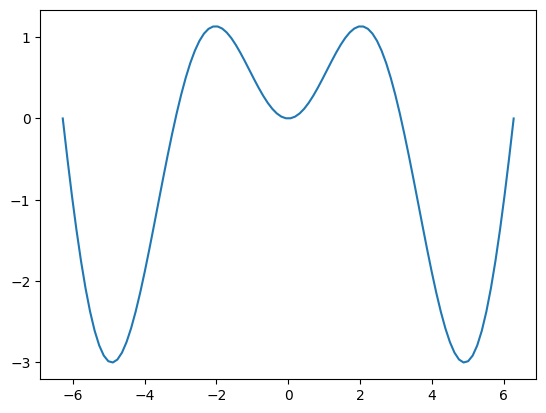

In [78]:
plt.plot(x, g_ymean)

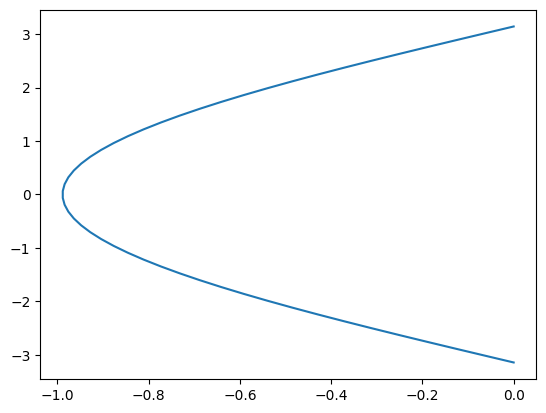

In [79]:
plt.plot(g_xmean, y)

<a name="Data_Files"></a>
### Fichiers de données

Il peut être utile d'enregistrer les données numpy dans des fichiers.

In [80]:
np.save('g.npy', g)

**Attention**

Les fichiers Numpy `.npy` sont un moyen pratique de stocker des données temporaires, mais ils ne sont pas considérés comme un format d'archivage robuste. Plus tard, nous découvrirons NetCDF, le format recommandé pour stocker les données terrestres et environnementales

In [81]:
g_loaded = np.load('g.npy')

np.testing.assert_equal(g, g_loaded)